In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('Food_Inspections.csv')
df

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2587331,"B' GABS GOODIES, LLC","B' GABS GOODIES, LLC",2362789.0,Restaurant,Risk 1 (High),1450 E 57TH ST,CHICAGO,IL,60637.0,12/21/2023,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.791626,-87.589705,"(41.791625797952214, -87.58970533292076)"
1,2587309,IPSENTO COFFEE,IPSENTO COFFEE,2446722.0,Restaurant,Risk 2 (Medium),1813 N MILWAUKEE AVE,CHICAGO,IL,60647.0,12/21/2023,Canvass Re-Inspection,Pass,NaN,41.914351,-87.683377,"(41.91435120295626, -87.6833767767167)"
2,2587204,QUESADILLA LA REINA DEL SUR INC.,QUESADILLA LA REINA DEL SUR,2917549.0,Restaurant,Risk 3 (Low),2237 N WESTERN AVE,CHICAGO,IL,60647.0,12/19/2023,License,Pass,NaN,41.922767,-87.687429,"(41.92276684658204, -87.68742931955062)"
3,2587191,CHICAGO CHEESE STEAK COMPANY,CHICAGO CHEESE STEAK COMPANY,1302448.0,Restaurant,Risk 2 (Medium),7759 S CICERO AVE,CHICAGO,IL,60652.0,12/19/2023,Canvass,Out of Business,NaN,41.751066,-87.741281,"(41.751066159679944, -87.74128107760146)"
4,2587197,RACINE PLUMBING,RACINE PLUMBING,1383544.0,Restaurant,Risk 1 (High),2642 N LINCOLN AVE,CHICAGO,IL,60614.0,12/19/2023,Canvass Re-Inspection,Pass,NaN,41.929842,-87.655127,"(41.929842384442395, -87.65512664177405)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265158,54224,BEEFEE SUBMARINE INC,BEEFEE SUBMARINE INC,60297.0,Restaurant,Risk 2 (Medium),3357 W CHICAGO AVE,CHICAGO,IL,60651.0,01/12/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.895399,-87.711216,"(41.89539877332381, -87.71121630512987)"
265159,176563,ERIC'S FOOD CENTER,ERIC'S FOOD CENTER,2020869.0,Grocery Store,Risk 2 (Medium),13209 S BALTIMORE AVE,CHICAGO,IL,60633.0,03/09/2010,License Re-Inspection,Pass,NaN,41.655189,-87.546999,"(41.65518859029959, -87.54699941852803)"
265160,248207,CHONG RO RESTAURANT,CHONG RO RESTAURANT,27878.0,NaN,Risk 1 (High),4811 N ROCKWELL ST,CHICAGO,IL,60625.0,03/25/2010,Canvass,Fail,NaN,41.968920,-87.693661,"(41.96891957958689, -87.69366142212719)"
265161,70315,CVS/ PHARMACY #3170,CVS/ PHARMACY #3170,1302694.0,Grocery Store,Risk 3 (Low),6417 W HIGGINS AVE,CHICAGO,IL,60656.0,02/01/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.976422,-87.788648,"(41.97642160088368, -87.78864760578642)"


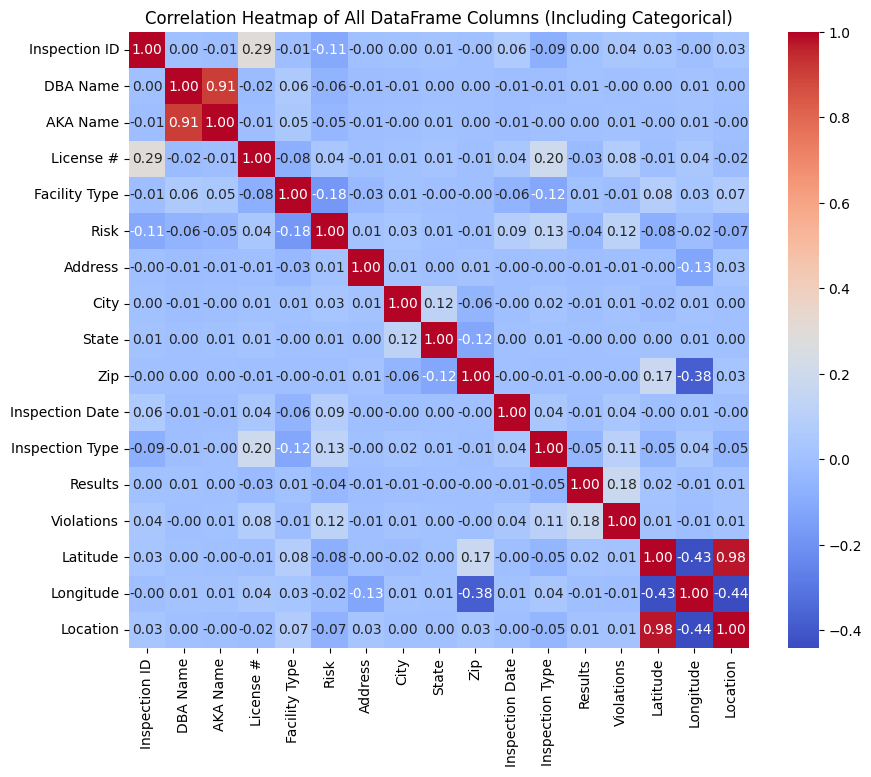

In [5]:

from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
data_encoded = df.copy()
label_encoder = LabelEncoder()
for col in categorical_columns:
    data_encoded[col] = label_encoder.fit_transform(df[col])
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All DataFrame Columns (Including Categorical)')
plt.show()

In [ ]:
columns_for_scatterplot = [
    'Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk',
    'Address', 'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type', 
    'Violations', 'Latitude', 'Longitude', 'Location'
]

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.subplots_adjust(hspace=0.5)

for idx, col in enumerate(columns_for_scatterplot):
    sns.scatterplot(ax=axes[idx // 4, idx % 4], x=df[col], y=df['Results'])
    axes[idx // 4, idx % 4].set_title(f'Relationship between {col} and Results')

plt.tight_layout()
plt.show()

In [ ]:
numerical_columns = ['License #', 'Zip', 'Latitude', 'Longitude']

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column].dropna(), bins=20)  # Drop NaN values and plot histogram
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(6, 4))
        plt.scatter(df[numerical_columns[i]].dropna(), df[numerical_columns[j]].dropna())  
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.title(f'Scatter plot of {numerical_columns[i]} vs {numerical_columns[j]}')
        plt.show()



In [3]:
df = df.drop("Inspection ID", axis=1)
df = df.drop('AKA Name', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('License #', axis=1)
df = df.drop('Violations', axis=1)
df = df.drop('DBA Name', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('Zip', axis=1)
df = df.drop('State', axis=1)


In [4]:
df

,Facility Type,Risk,City,Inspection Date,Inspection Type,Results,Location
0,Restaurant,Risk 1 (High),CHICAGO,12/21/2023,Canvass,Pass,"(41.791625797952214, -87.58970533292076)"
1,Restaurant,Risk 2 (Medium),CHICAGO,12/21/2023,Canvass Re-Inspection,Pass,"(41.91435120295626, -87.6833767767167)"
2,Restaurant,Risk 3 (Low),CHICAGO,12/19/2023,License,Pass,"(41.92276684658204, -87.68742931955062)"
3,Restaurant,Risk 2 (Medium),CHICAGO,12/19/2023,Canvass,Out of Business,"(41.751066159679944, -87.74128107760146)"
4,Restaurant,Risk 1 (High),CHICAGO,12/19/2023,Canvass Re-Inspection,Pass,"(41.929842384442395, -87.65512664177405)"
...,...,...,...,...,...,...,...
265158,Restaurant,Risk 2 (Medium),CHICAGO,01/12/2010,Canvass,Pass,"(41.89539877332381, -87.71121630512987)"
265159,Grocery Store,Risk 2 (Medium),CHICAGO,03/09/2010,License Re-Inspection,Pass,"(41.65518859029959, -87.54699941852803)"
265160,NaN,Risk 1 (High),CHICAGO,03/25/2010,Canvass,Fail,"(41.96891957958689, -87.69366142212719)"
265161,Grocery Store,Risk 3 (Low),CHICAGO,02/01/2010,Canvass,Pass,"(41.97642160088368, -87.78864760578642)"


In [5]:
def count_unique_values(df):
    unique_counts = {}
    for column in df.columns:
        unique_values = df[column].unique()
        unique_counts[column] = len(unique_values)
    return unique_counts



In [6]:
def count_none_values(df):
    none_counts = {}
    for column in df.columns:
        none_values = df[column].isnull().sum()
        none_counts[column] = none_values
    return none_counts



In [ ]:
numerical_columns = df_copy.select_dtypes(include='number').columns.tolist()
categorical_columns = df_copy.select_dtypes(exclude='number').columns.tolist()

plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(x=df_copy[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
numerical_columns = ['License #', 'Inspection ID', 'Longitude']
z_scores = np.abs(stats.zscore(df[numerical_columns]))
numerical_columns = ['Inspection ID', 'License #', 'Zip', 'Latitude']
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR
df = df[~((df[numerical_columns] < (Q1 - outlier_step)) | (df[numerical_columns] > (Q3 + outlier_step))).any(axis=1)]
df.head

In [7]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df['Inspection Date'] = df['Inspection Date'].apply(lambda x: x.timestamp())
df

,Facility Type,Risk,City,Inspection Date,Inspection Type,Results,Location
0,Restaurant,Risk 1 (High),CHICAGO,1.703117e+09,Canvass,Pass,"(41.791625797952214, -87.58970533292076)"
1,Restaurant,Risk 2 (Medium),CHICAGO,1.703117e+09,Canvass Re-Inspection,Pass,"(41.91435120295626, -87.6833767767167)"
2,Restaurant,Risk 3 (Low),CHICAGO,1.702944e+09,License,Pass,"(41.92276684658204, -87.68742931955062)"
3,Restaurant,Risk 2 (Medium),CHICAGO,1.702944e+09,Canvass,Out of Business,"(41.751066159679944, -87.74128107760146)"
4,Restaurant,Risk 1 (High),CHICAGO,1.702944e+09,Canvass Re-Inspection,Pass,"(41.929842384442395, -87.65512664177405)"
...,...,...,...,...,...,...,...
265158,Restaurant,Risk 2 (Medium),CHICAGO,1.263254e+09,Canvass,Pass,"(41.89539877332381, -87.71121630512987)"
265159,Grocery Store,Risk 2 (Medium),CHICAGO,1.268093e+09,License Re-Inspection,Pass,"(41.65518859029959, -87.54699941852803)"
265160,NaN,Risk 1 (High),CHICAGO,1.269475e+09,Canvass,Fail,"(41.96891957958689, -87.69366142212719)"
265161,Grocery Store,Risk 3 (Low),CHICAGO,1.264982e+09,Canvass,Pass,"(41.97642160088368, -87.78864760578642)"


In [8]:
from geopy.distance import geodesic

In [9]:
import ast

In [10]:
df['Location'] = df['Location'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [11]:
center = tuple(df['Location'].apply(lambda x: pd.Series(x)).mean())

In [12]:
center

(41.8807974391114, -87.67652693127872)

In [13]:
def distance_to_center(point):
    if isinstance(point, tuple):
        lat, lon = point
        return geodesic((lat, lon), center).meters
    else:
        return None

df['Distance'] = df['Location'].apply(distance_to_center)

In [14]:
df = df.drop('Location', axis=1)
df

,Facility Type,Risk,City,Inspection Date,Inspection Type,Results,Distance
0,Restaurant,Risk 1 (High),CHICAGO,1.703117e+09,Canvass,Pass,12251.657657
1,Restaurant,Risk 2 (Medium),CHICAGO,1.703117e+09,Canvass Re-Inspection,Pass,3769.959074
2,Restaurant,Risk 3 (Low),CHICAGO,1.702944e+09,License,Pass,4748.570403
3,Restaurant,Risk 2 (Medium),CHICAGO,1.702944e+09,Canvass,Out of Business,15380.954674
4,Restaurant,Risk 1 (High),CHICAGO,1.702944e+09,Canvass Re-Inspection,Pass,5729.584083
...,...,...,...,...,...,...,...
265158,Restaurant,Risk 2 (Medium),CHICAGO,1.263254e+09,Canvass,Pass,3304.427360
265159,Grocery Store,Risk 2 (Medium),CHICAGO,1.268093e+09,License Re-Inspection,Pass,27274.680398
265160,NaN,Risk 1 (High),CHICAGO,1.269475e+09,Canvass,Fail,9890.538441
265161,Grocery Store,Risk 3 (Low),CHICAGO,1.264982e+09,Canvass,Pass,14117.101523


In [15]:
count_none_values(df)

{'Facility Type': 5100,
 'Risk': 79,
 'City': 187,
 'Inspection Date': 0,
 'Inspection Type': 1,
 'Results': 0,
 'Distance': 908}

In [16]:
df = df.dropna()

In [17]:
df

,Facility Type,Risk,City,Inspection Date,Inspection Type,Results,Distance
0,Restaurant,Risk 1 (High),CHICAGO,1.703117e+09,Canvass,Pass,12251.657657
1,Restaurant,Risk 2 (Medium),CHICAGO,1.703117e+09,Canvass Re-Inspection,Pass,3769.959074
2,Restaurant,Risk 3 (Low),CHICAGO,1.702944e+09,License,Pass,4748.570403
3,Restaurant,Risk 2 (Medium),CHICAGO,1.702944e+09,Canvass,Out of Business,15380.954674
4,Restaurant,Risk 1 (High),CHICAGO,1.702944e+09,Canvass Re-Inspection,Pass,5729.584083
...,...,...,...,...,...,...,...
265157,School,Risk 1 (High),CHICAGO,1.264118e+09,Canvass,Fail,3131.414151
265158,Restaurant,Risk 2 (Medium),CHICAGO,1.263254e+09,Canvass,Pass,3304.427360
265159,Grocery Store,Risk 2 (Medium),CHICAGO,1.268093e+09,License Re-Inspection,Pass,27274.680398
265161,Grocery Store,Risk 3 (Low),CHICAGO,1.264982e+09,Canvass,Pass,14117.101523


In [18]:
df = df.drop('City', axis=1)

In [19]:
df

,Facility Type,Risk,Inspection Date,Inspection Type,Results,Distance
0,Restaurant,Risk 1 (High),1.703117e+09,Canvass,Pass,12251.657657
1,Restaurant,Risk 2 (Medium),1.703117e+09,Canvass Re-Inspection,Pass,3769.959074
2,Restaurant,Risk 3 (Low),1.702944e+09,License,Pass,4748.570403
3,Restaurant,Risk 2 (Medium),1.702944e+09,Canvass,Out of Business,15380.954674
4,Restaurant,Risk 1 (High),1.702944e+09,Canvass Re-Inspection,Pass,5729.584083
...,...,...,...,...,...,...
265157,School,Risk 1 (High),1.264118e+09,Canvass,Fail,3131.414151
265158,Restaurant,Risk 2 (Medium),1.263254e+09,Canvass,Pass,3304.427360
265159,Grocery Store,Risk 2 (Medium),1.268093e+09,License Re-Inspection,Pass,27274.680398
265161,Grocery Store,Risk 3 (Low),1.264982e+09,Canvass,Pass,14117.101523


In [20]:
count_unique_values(df)

{'Facility Type': 500,
 'Risk': 4,
 'Inspection Date': 3530,
 'Inspection Type': 107,
 'Results': 7,
 'Distance': 17274}

In [21]:
df = df.drop('Facility Type', axis=1)
df

,Risk,Inspection Date,Inspection Type,Results,Distance
0,Risk 1 (High),1.703117e+09,Canvass,Pass,12251.657657
1,Risk 2 (Medium),1.703117e+09,Canvass Re-Inspection,Pass,3769.959074
2,Risk 3 (Low),1.702944e+09,License,Pass,4748.570403
3,Risk 2 (Medium),1.702944e+09,Canvass,Out of Business,15380.954674
4,Risk 1 (High),1.702944e+09,Canvass Re-Inspection,Pass,5729.584083
...,...,...,...,...,...
265157,Risk 1 (High),1.264118e+09,Canvass,Fail,3131.414151
265158,Risk 2 (Medium),1.263254e+09,Canvass,Pass,3304.427360
265159,Risk 2 (Medium),1.268093e+09,License Re-Inspection,Pass,27274.680398
265161,Risk 3 (Low),1.264982e+09,Canvass,Pass,14117.101523


In [22]:
df = pd.get_dummies(df, columns=['Inspection Type'])
df

,Risk,Inspection Date,Results,Distance,Inspection Type_1315 license reinspection,Inspection Type_ADDENDUM,Inspection Type_ASSESSMENT,Inspection Type_Business Not Located,Inspection Type_CANVAS,Inspection Type_CANVASS,...,Inspection Type_expansion,Inspection Type_finish complaint inspection from 5-18-10,Inspection Type_fire complaint,Inspection Type_license,Inspection Type_license task 1474,Inspection Type_no entry,Inspection Type_out ofbusiness,Inspection Type_sfp/complaint,Inspection Type_task force,Inspection Type_task force(1470) liquor tavern
0,Risk 1 (High),1.703117e+09,Pass,12251.657657,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Risk 2 (Medium),1.703117e+09,Pass,3769.959074,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Risk 3 (Low),1.702944e+09,Pass,4748.570403,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Risk 2 (Medium),1.702944e+09,Out of Business,15380.954674,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Risk 1 (High),1.702944e+09,Pass,5729.584083,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265157,Risk 1 (High),1.264118e+09,Fail,3131.414151,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265158,Risk 2 (Medium),1.263254e+09,Pass,3304.427360,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265159,Risk 2 (Medium),1.268093e+09,Pass,27274.680398,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265161,Risk 3 (Low),1.264982e+09,Pass,14117.101523,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df['Results'] = df['Results'].rank(method='dense').astype(int)
df['Risk'] = df['Risk'].rank(method='dense').astype(int)
df

,Risk,Inspection Date,Results,Distance,Inspection Type_1315 license reinspection,Inspection Type_ADDENDUM,Inspection Type_ASSESSMENT,Inspection Type_Business Not Located,Inspection Type_CANVAS,Inspection Type_CANVASS,...,Inspection Type_expansion,Inspection Type_finish complaint inspection from 5-18-10,Inspection Type_fire complaint,Inspection Type_license,Inspection Type_license task 1474,Inspection Type_no entry,Inspection Type_out ofbusiness,Inspection Type_sfp/complaint,Inspection Type_task force,Inspection Type_task force(1470) liquor tavern
0,2,1.703117e+09,6,12251.657657,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1.703117e+09,6,3769.959074,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,1.702944e+09,6,4748.570403,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1.702944e+09,5,15380.954674,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1.702944e+09,6,5729.584083,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265157,2,1.264118e+09,2,3131.414151,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265158,3,1.263254e+09,6,3304.427360,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265159,3,1.268093e+09,6,27274.680398,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265161,4,1.264982e+09,6,14117.101523,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df = df.replace({False: 0, True: 1})
df

,Risk,Inspection Date,Results,Distance,Inspection Type_1315 license reinspection,Inspection Type_ADDENDUM,Inspection Type_ASSESSMENT,Inspection Type_Business Not Located,Inspection Type_CANVAS,Inspection Type_CANVASS,...,Inspection Type_expansion,Inspection Type_finish complaint inspection from 5-18-10,Inspection Type_fire complaint,Inspection Type_license,Inspection Type_license task 1474,Inspection Type_no entry,Inspection Type_out ofbusiness,Inspection Type_sfp/complaint,Inspection Type_task force,Inspection Type_task force(1470) liquor tavern
0,2,1.703117e+09,6,12251.657657,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1.703117e+09,6,3769.959074,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1.702944e+09,6,4748.570403,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.702944e+09,5,15380.954674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.702944e+09,6,5729.584083,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265157,2,1.264118e+09,2,3131.414151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265158,3,1.263254e+09,6,3304.427360,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265159,3,1.268093e+09,6,27274.680398,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265161,4,1.264982e+09,6,14117.101523,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.preprocessing import MinMaxScaler


In [26]:
scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df[['Distance']])

df['Distance'] = scaled_values

In [27]:
df

,Risk,Inspection Date,Results,Distance,Inspection Type_1315 license reinspection,Inspection Type_ADDENDUM,Inspection Type_ASSESSMENT,Inspection Type_Business Not Located,Inspection Type_CANVAS,Inspection Type_CANVASS,...,Inspection Type_expansion,Inspection Type_finish complaint inspection from 5-18-10,Inspection Type_fire complaint,Inspection Type_license,Inspection Type_license task 1474,Inspection Type_no entry,Inspection Type_out ofbusiness,Inspection Type_sfp/complaint,Inspection Type_task force,Inspection Type_task force(1470) liquor tavern
0,2,1.703117e+09,6,0.427353,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1.703117e+09,6,0.129805,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1.702944e+09,6,0.164136,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.702944e+09,5,0.537132,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.702944e+09,6,0.198551,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265157,2,1.264118e+09,2,0.107404,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265158,3,1.263254e+09,6,0.113474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265159,3,1.268093e+09,6,0.954378,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265161,4,1.264982e+09,6,0.492795,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split


In [29]:
X = df.drop('Results', axis=1)
y = df['Results']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [32]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

In [34]:
y_pred = clf.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.45985288723285134


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


In [40]:
accuracy

0.5216904453925904